In [77]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import math
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from itertools import cycle
from math import ceil
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
from tslearn.barycenters import dtw_barycenter_averaging
print("setup complete")

setup complete


In [8]:
sales = pd.read_csv('70prod_data.csv',\
                    index_col=0, parse_dates=True)

In [6]:
sales

,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,...,P_61,P_62,P_63,P_64,P_65,P_66,P_67,P_68,P_69,P_70
2014-07-31,2669,3603,3506,1274,1528,2244,1460,2523,2045,1713,...,1721,2506,3011,1039,1374,1840,1359,1407,1108,1544
2014-08-31,2794,3405,3279,1449,1526,1970,1423,2660,2065,1774,...,1906,2701,3081,1134,1331,1877,1424,1503,1061,1490
2014-09-30,2289,3434,3238,1426,1484,1877,1369,2581,1775,1875,...,1979,2618,3004,1160,1327,1827,1357,1449,1049,1465
2014-10-31,2310,3277,3088,1404,1500,1615,1159,2326,1614,1893,...,1982,2693,3215,1180,1369,1883,1384,1446,1050,1584
2014-11-30,2559,3396,2921,1329,1384,1796,1395,2351,1749,1678,...,2025,2607,3280,1065,1286,1766,1345,1377,988,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-31,4069,5337,5561,2936,2589,2900,3625,4075,3688,3497,...,2439,3478,3241,1634,1905,2248,1939,1968,1573,1718
2019-06-30,3546,5267,5565,2713,3286,2899,3630,3593,4068,3424,...,2350,3548,3188,1597,2208,2307,1899,1984,1671,1797
2019-07-31,3576,4810,5065,2448,2404,3081,3359,3352,3630,3272,...,2392,3253,3492,1560,2290,2514,2121,1970,1968,1966
2019-08-31,3912,4989,4942,2843,2525,3198,3415,3792,4417,3133,...,2599,3200,3807,1817,2556,2532,2179,2110,1873,2010


In [110]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
P_1,63.0,3510.761905,656.364885,2289.0,2997.0,3546.0,3992.0,4885.0
P_2,63.0,4341.333333,671.591874,3152.0,3848.0,4464.0,4810.0,5873.0
P_3,63.0,4448.523810,693.352814,2909.0,4105.5,4607.0,4943.0,5644.0
P_4,63.0,2267.888889,435.481014,1274.0,2065.0,2371.0,2541.5,2974.0
P_5,63.0,2390.111111,489.206009,1252.0,2198.5,2492.0,2705.5,3327.0
...,...,...,...,...,...,...,...,...
P_66,63.0,2075.317460,231.814082,1742.0,1877.5,2035.0,2231.0,2591.0
P_67,63.0,1685.857143,275.337556,1294.0,1424.0,1645.0,1928.5,2199.0
P_68,63.0,1649.063492,303.335058,748.0,1427.5,1562.0,1915.5,2243.0
P_69,63.0,1420.682540,313.456218,766.0,1164.0,1538.0,1658.5,1968.0


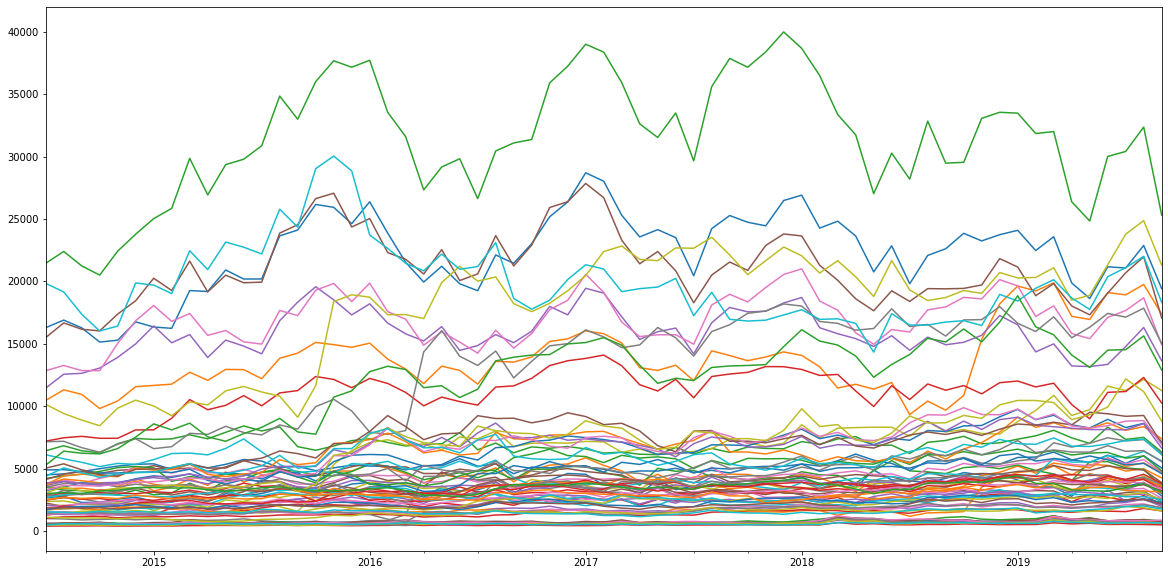

In [114]:
sales.plot(figsize=(20, 10),legend=False)
plt.show()


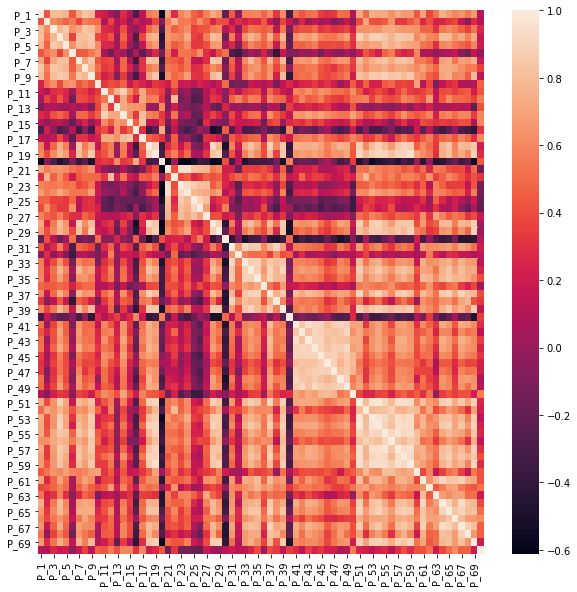

In [121]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(sales.corr())

In [50]:
mySeries = [sales[[col]] for col in sales.columns]
scaler = MinMaxScaler()
for i in range(len(mySeries)):
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

In [51]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(mySeries)

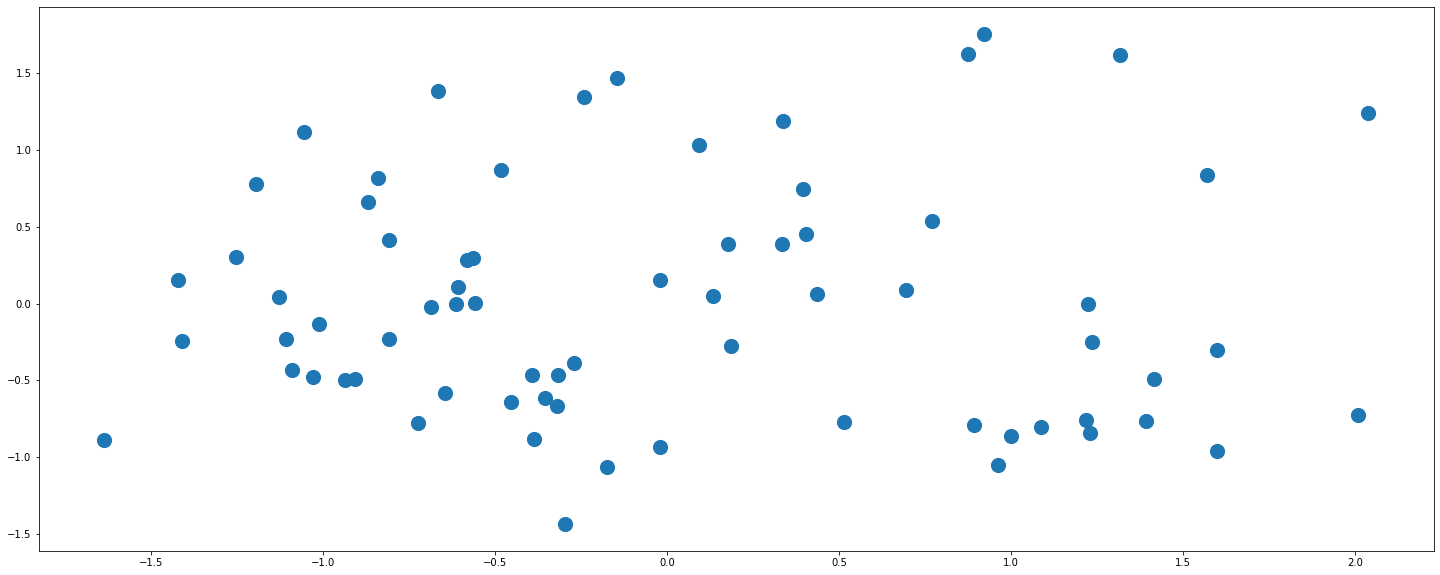

In [52]:
plt.figure(figsize=(25,10))
plt.scatter(pca_res[:,0],pca_res[:,1], s=200)
plt.show()

In [53]:
print(pca_res[:10,:])


[[-0.61355657 -0.00271688]
 [ 0.09205821  1.03059421]
 [-0.87143019  0.66107055]
 [-1.13037105  0.04106856]
 [-0.8099231   0.41134469]
 [-0.24329255  1.34396832]
 [-1.01364043 -0.13216305]
 [-0.56575707  0.29560193]
 [-1.42338057  0.15097156]
 [ 0.33610564  1.18921395]]


In [54]:
cluster_count = math.ceil(math.sqrt(len(mySeries))) 
cluster_count

9

In [55]:
kmeans = KMeans(n_clusters=cluster_count,max_iter=5000)

labels = kmeans.fit_predict(pca_res)

In [79]:
#KMeans.transform(pca_res)
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, pca_res)
closest

array([43, 20, 37, 21, 18, 29, 54, 49,  1], dtype=int64)

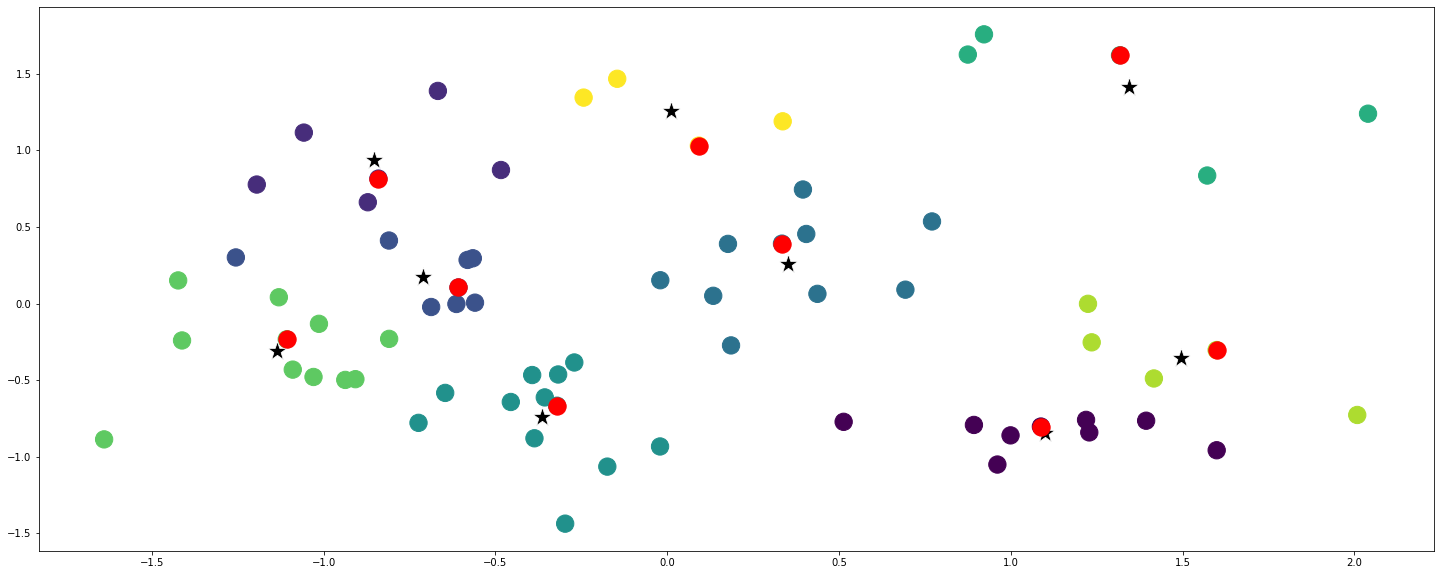

In [82]:
plt.figure(figsize=(25,10))
plt.scatter(pca_res[:, 0], pca_res[:, 1], c=labels, s=300)
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                marker='*', 
                color='black', 
                s=400);
plt.scatter(pca_res[closest, 0], pca_res[closest, 1], c='red', s=300)
plt.show()

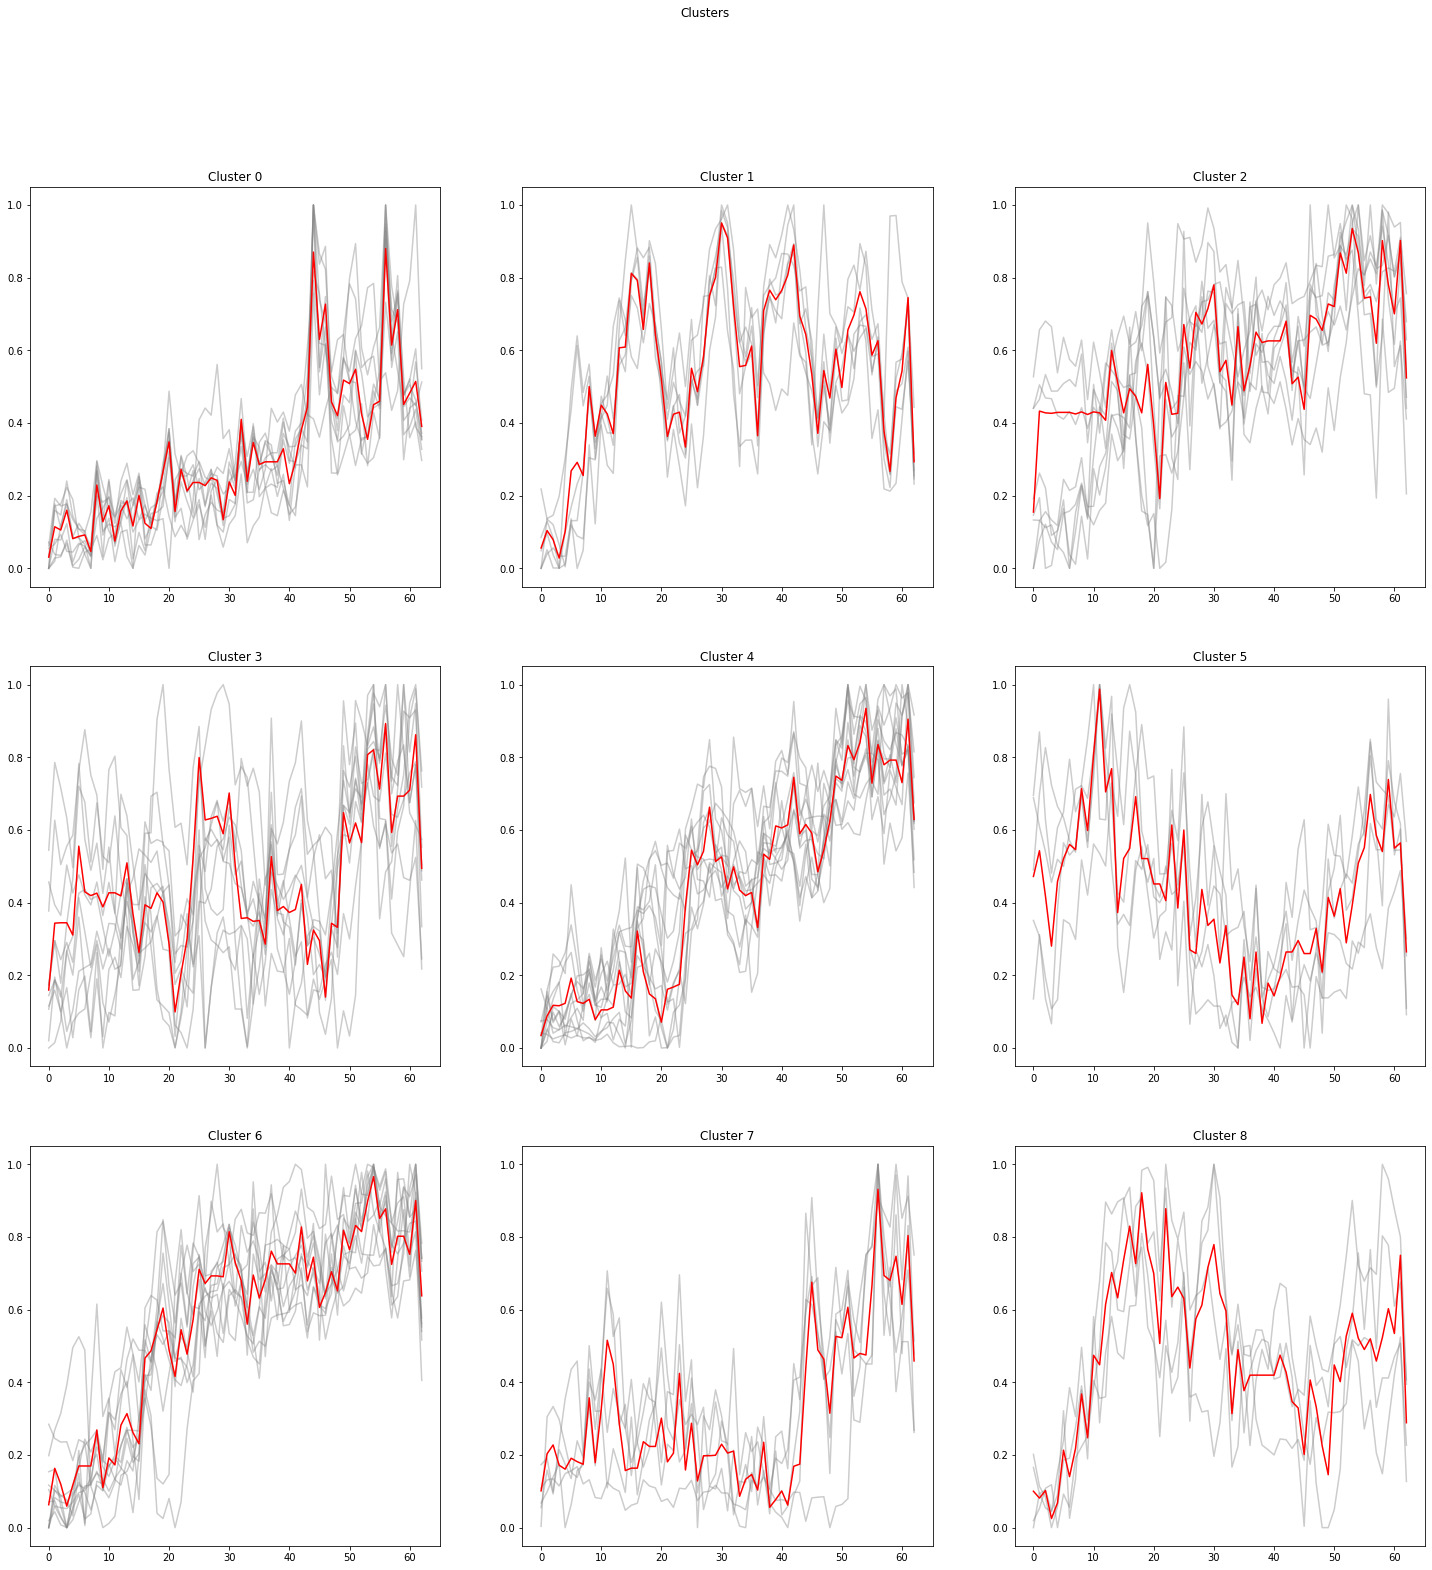

In [63]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(mySeries))))
plot_count = math.ceil(math.sqrt(cluster_count))


fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        #axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red") 
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

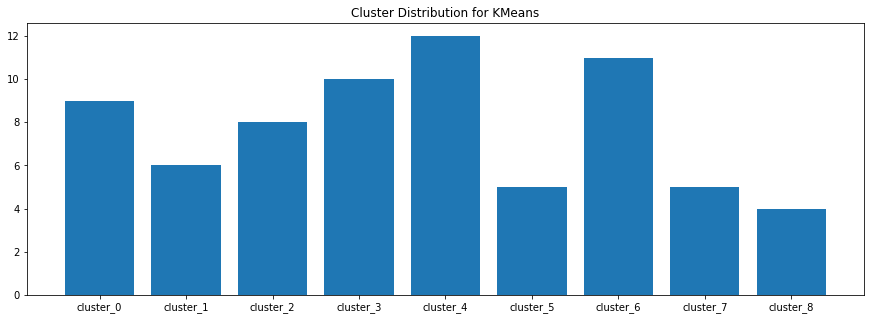

In [64]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["cluster_"+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [71]:
namesofMySeries=sales.columns
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
groups = pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).\
    sort_values(by="Cluster").set_index("Cluster")
res = pd.DataFrame(zip(sorted(set(fancy_names_for_labels)), \
                       [' ; '.join(sorted(groups[groups.index == label]['Series'], key=lambda x: int(x.split('_')[1]))) for label in sorted(set(fancy_names_for_labels))]),\
                   columns=["Cluster", "Series"]).set_index("Cluster")
res

,Series
Cluster,
Cluster 0,P_41 ; P_42 ; P_43 ; P_44 ; P_45 ; P_47 ; P_48...
Cluster 1,P_3 ; P_21 ; P_23 ; P_24 ; P_25 ; P_27
Cluster 2,P_1 ; P_5 ; P_8 ; P_31 ; P_38 ; P_52 ; P_56 ; ...
Cluster 3,P_15 ; P_17 ; P_22 ; P_32 ; P_36 ; P_60 ; P_62...
Cluster 4,P_18 ; P_19 ; P_34 ; P_35 ; P_37 ; P_39 ; P_51...
Cluster 5,P_13 ; P_16 ; P_20 ; P_30 ; P_40
Cluster 6,P_4 ; P_7 ; P_9 ; P_28 ; P_29 ; P_33 ; P_53 ; ...
Cluster 7,P_11 ; P_12 ; P_14 ; P_46 ; P_50
Cluster 8,P_2 ; P_6 ; P_10 ; P_26


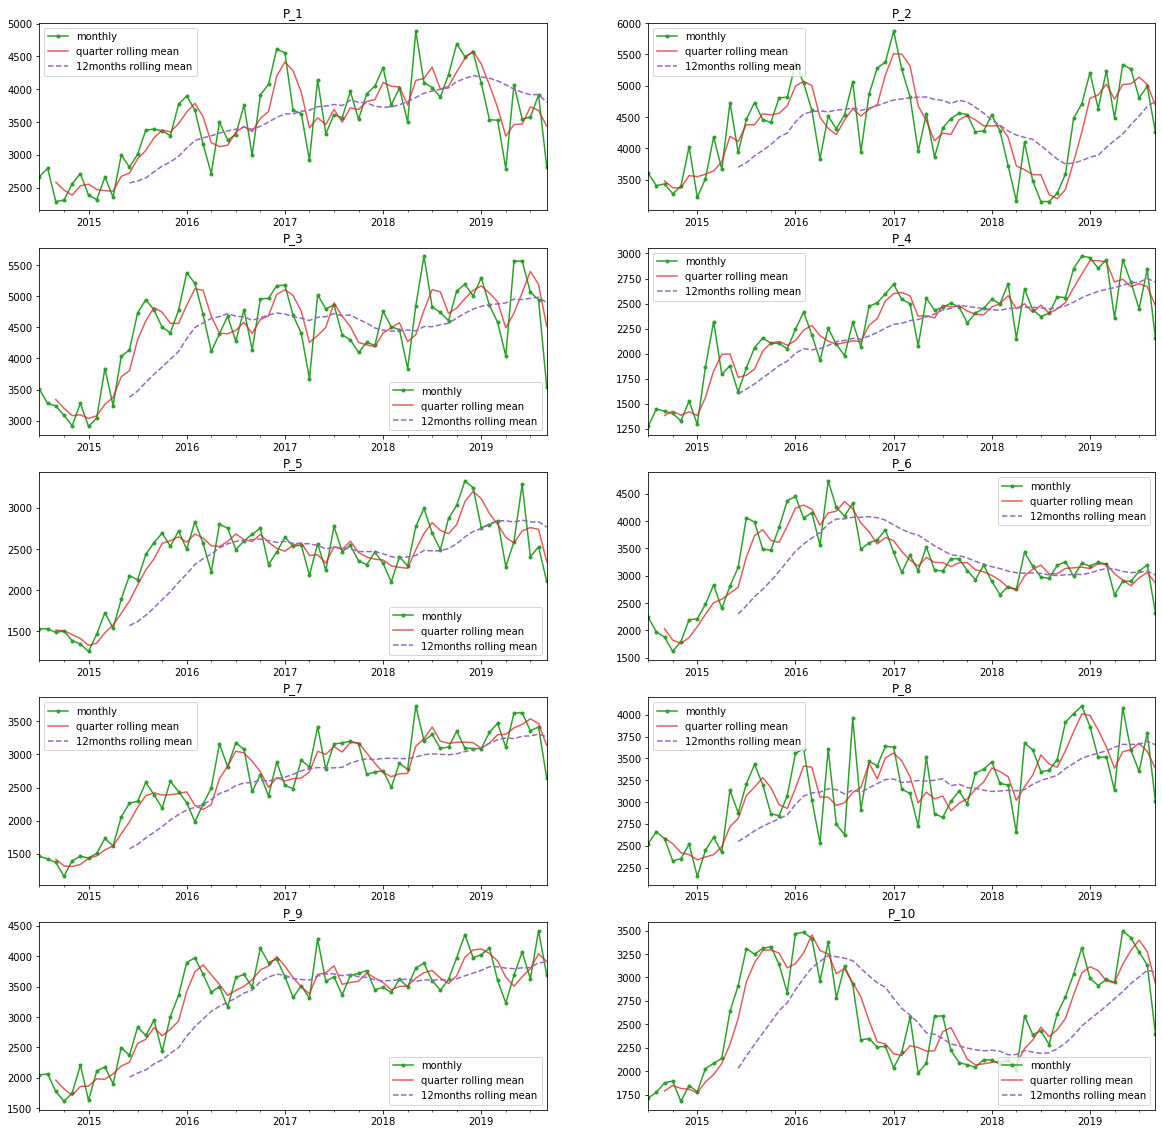

In [119]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
cols = [next(color_cycle), next(color_cycle), next(color_cycle)]
for i, item in enumerate(sales.columns):
    sales[item].plot(title=item,
                     color=cols[0],
                     ax=axs[i],
                     marker='.', label="monthly")
    sales[item].rolling(3).mean().plot(
                     color=cols[1],
                     ax=axs[i], label="quarter rolling mean", alpha=0.75)
    sales[item].rolling(12).mean().plot(
                     color=cols[2],
                     ax=axs[i], linestyle='--', label="12months rolling mean")
    axs[i].legend()
    if i==9 : break

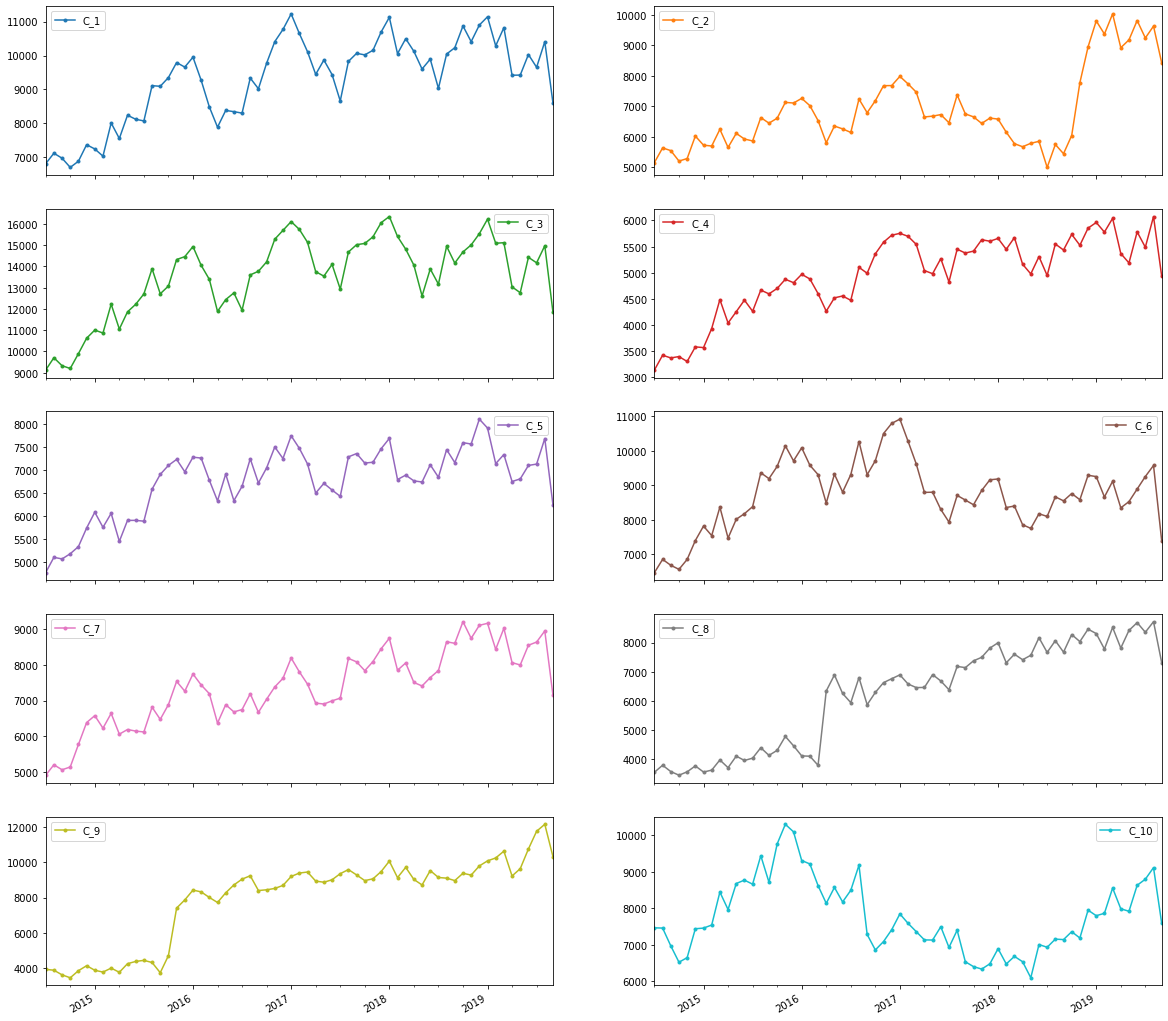

In [9]:
sales.plot(subplots=True,layout=(5,2),figsize=(20,20), marker='.')
plt.show()

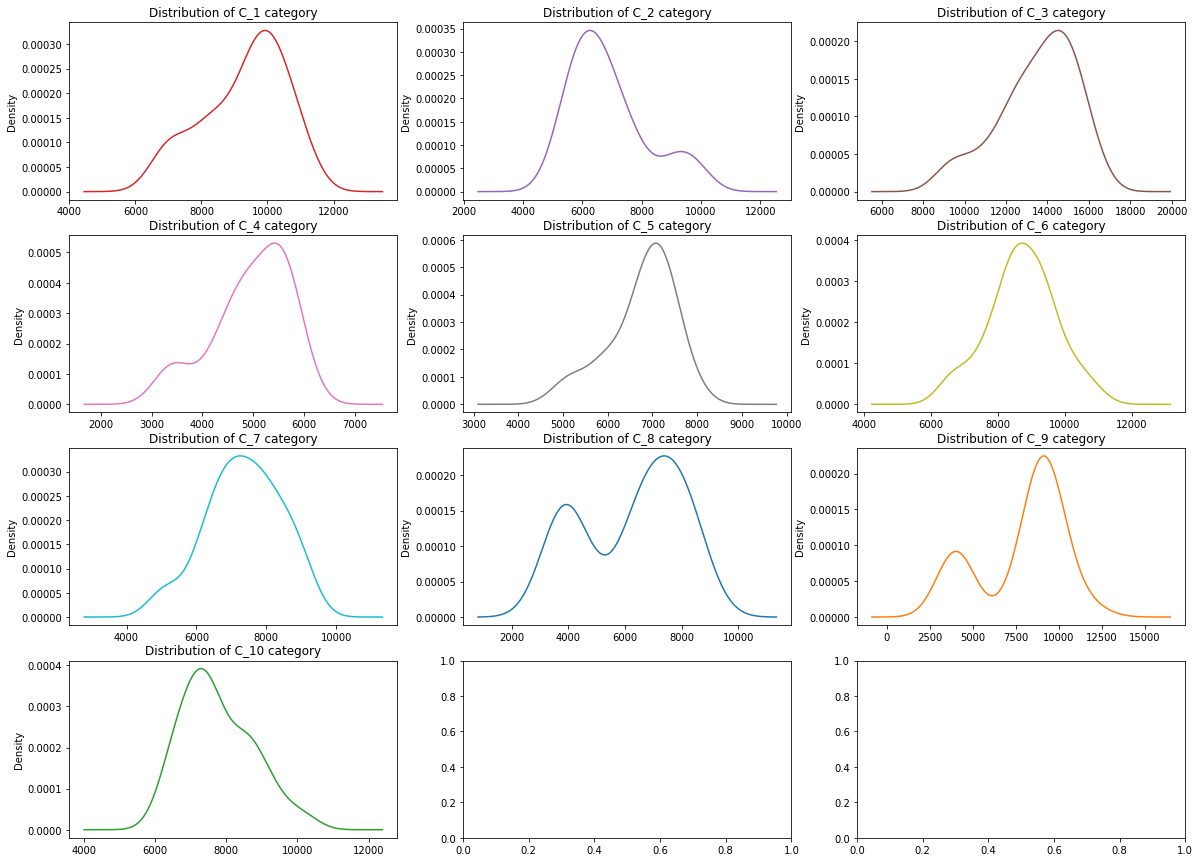

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
axs = axs.flatten()
for i, item in enumerate(sales.columns):
    sales[item].plot(kind='density',
                         title=f'Distribution of {item} category',
                     color=next(color_cycle),
                     ax=axs[i])

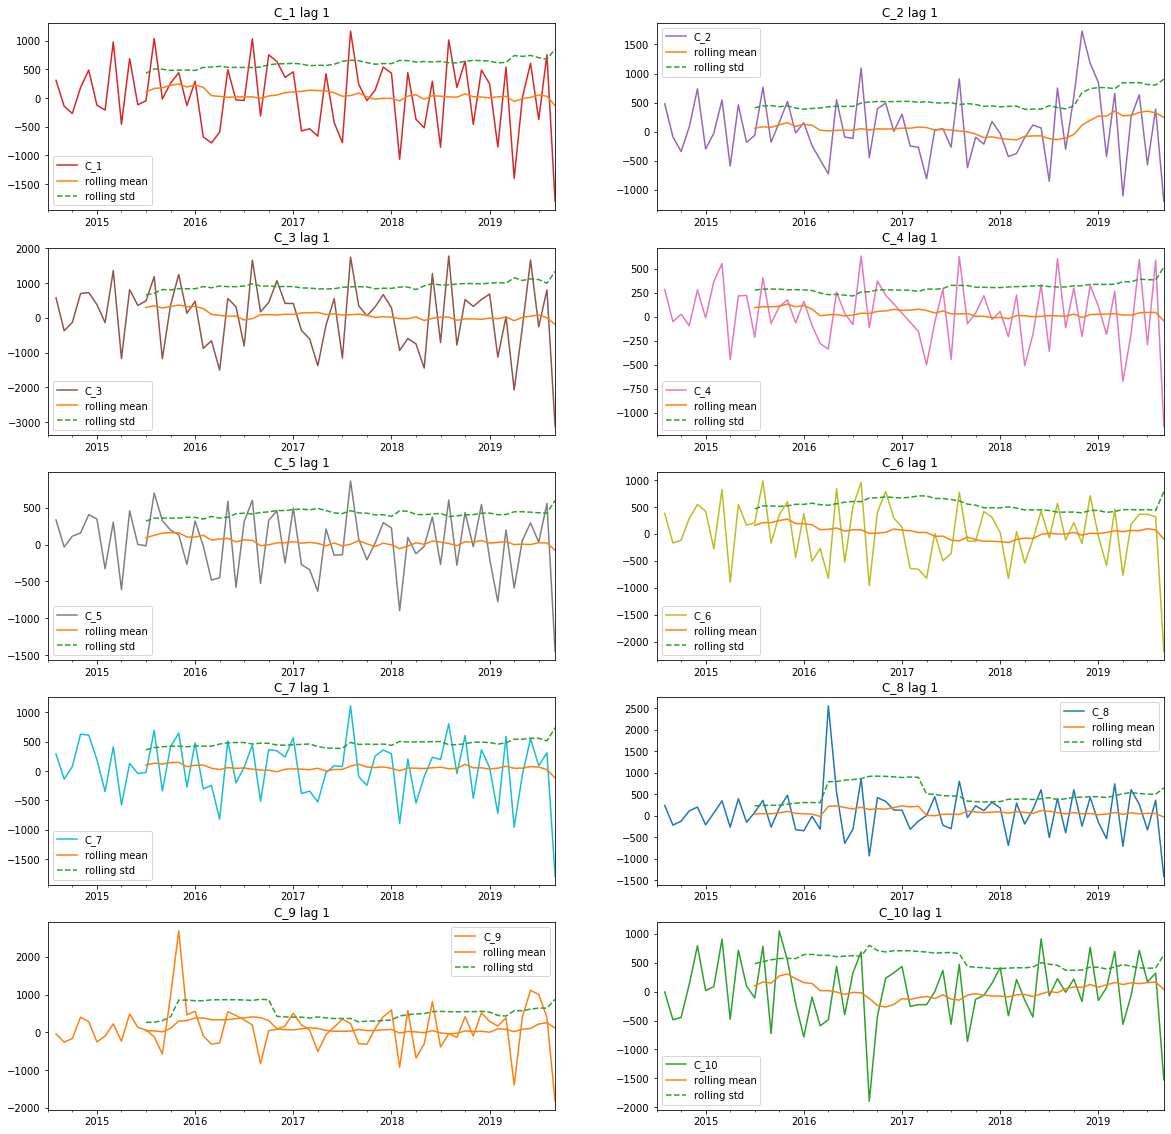

In [11]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i, item in enumerate(sales.columns):
    sales[item].diff().plot(title=f"{item} lag 1",
                     color=next(color_cycle),
                     ax=axs[i])
    sales[item].diff().rolling(12).mean().plot(
                     color=cols[1],
                     ax=axs[i], label="rolling mean")
    sales[item].diff().rolling(12).std().plot(
                     color=cols[2],
                     ax=axs[i], linestyle='--', label="rolling std")
    axs[i].legend()

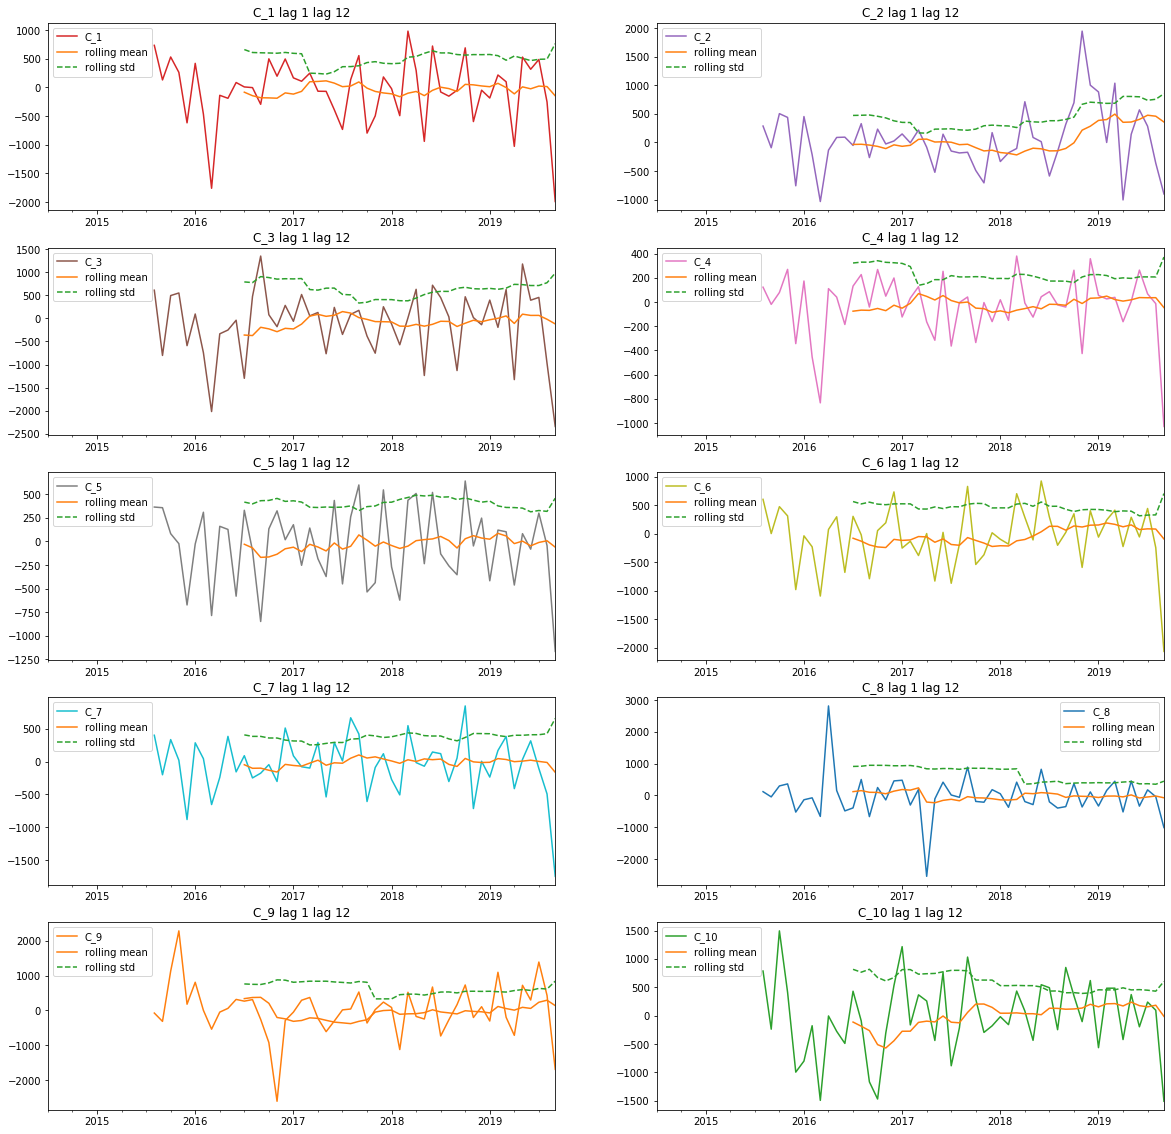

In [12]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i, item in enumerate(sales.columns):
    sales[item].diff(1).diff(12).plot(title=f"{item} lag 1 lag 12",
                     color=next(color_cycle),
                     ax=axs[i])
    sales[item].diff(1).diff(12).rolling(12).mean().plot(
                     color=cols[1],
                     ax=axs[i], label="rolling mean")
    sales[item].diff(1).diff(12).rolling(12).std().plot(
                     color=cols[2],
                     ax=axs[i], linestyle='--', label="rolling std")
    axs[i].legend()

In [13]:
sales.index.month

Int64Index([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
            12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
             5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9],
           dtype='int64')

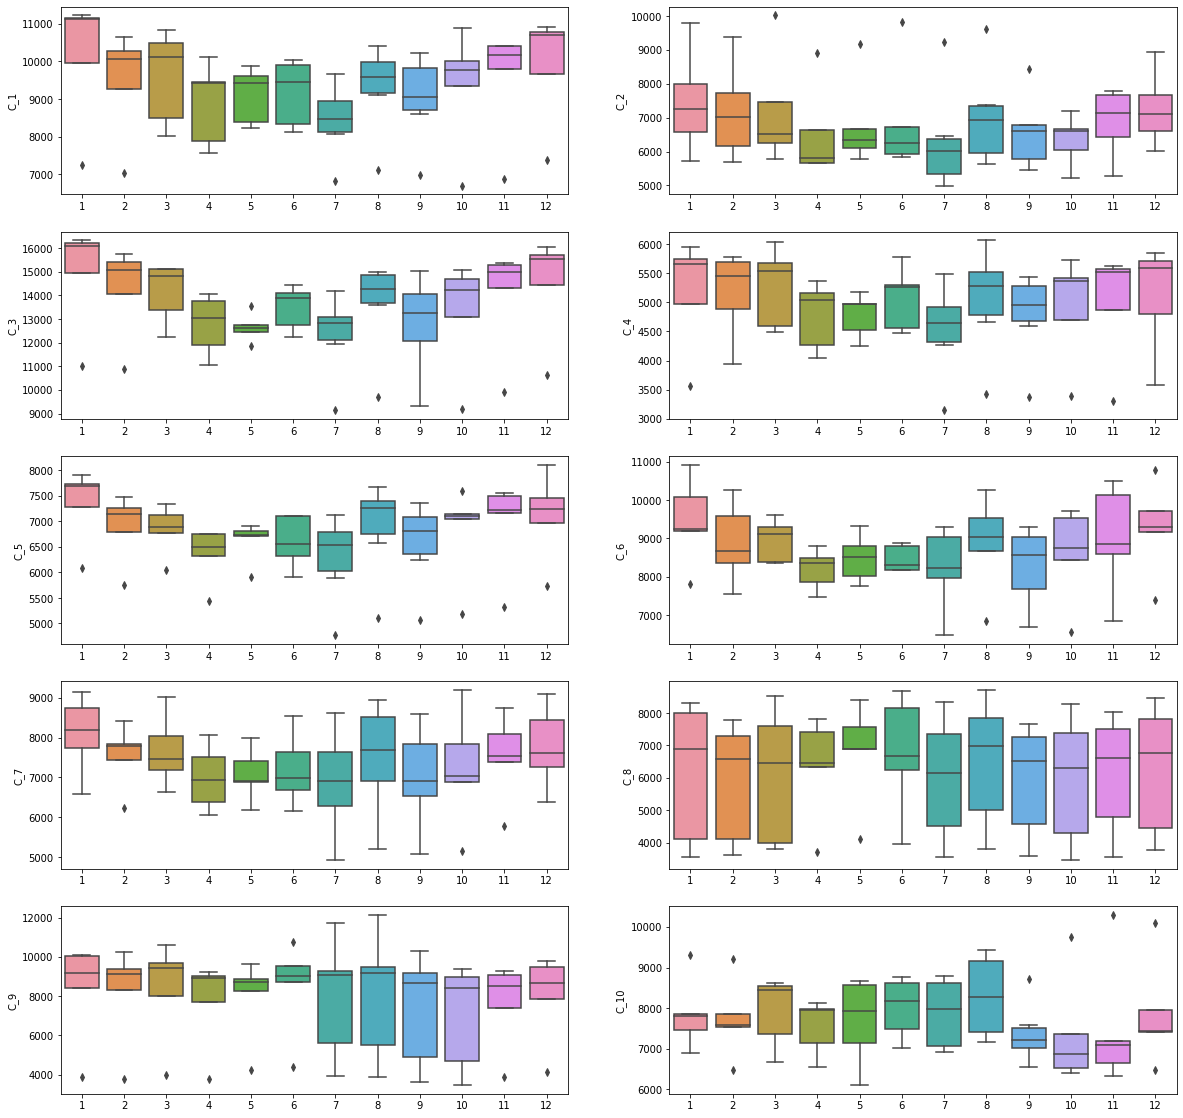

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
axes = axes.flatten()
for name, ax in zip(sales.columns, axes):
    sns.boxplot(data=sales, x=sales.index.month, y=name, ax=ax)

In [32]:
def plotseasonal(res, axes):
    res.observed.plot(ax=axes[0], legend=False, title=f"C_{plotseasonal.counter}")
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False, marker='o', linestyle='', markersize=5)
    axes[3].set_ylabel('Residual')
    plotseasonal.counter += 1
def grid_plotseasonal(df, ncol):
    nrow=ceil(10/ncol)*4
    fig, axes = plt.subplots(ncols=ncol, nrows=nrow, sharex=True, figsize=(15,1.5*nrow))
    plotseasonal.counter, k = 1, 0
    for i,col in enumerate(df.columns):
        res = seasonal_decompose(df[col].dropna(), period=12, filt=None)
        plotseasonal(res, axes[k:k+4, i%ncol])
        if (i%ncol)==(ncol-1) : k+=4
    plt.tight_layout()
    plt.show()

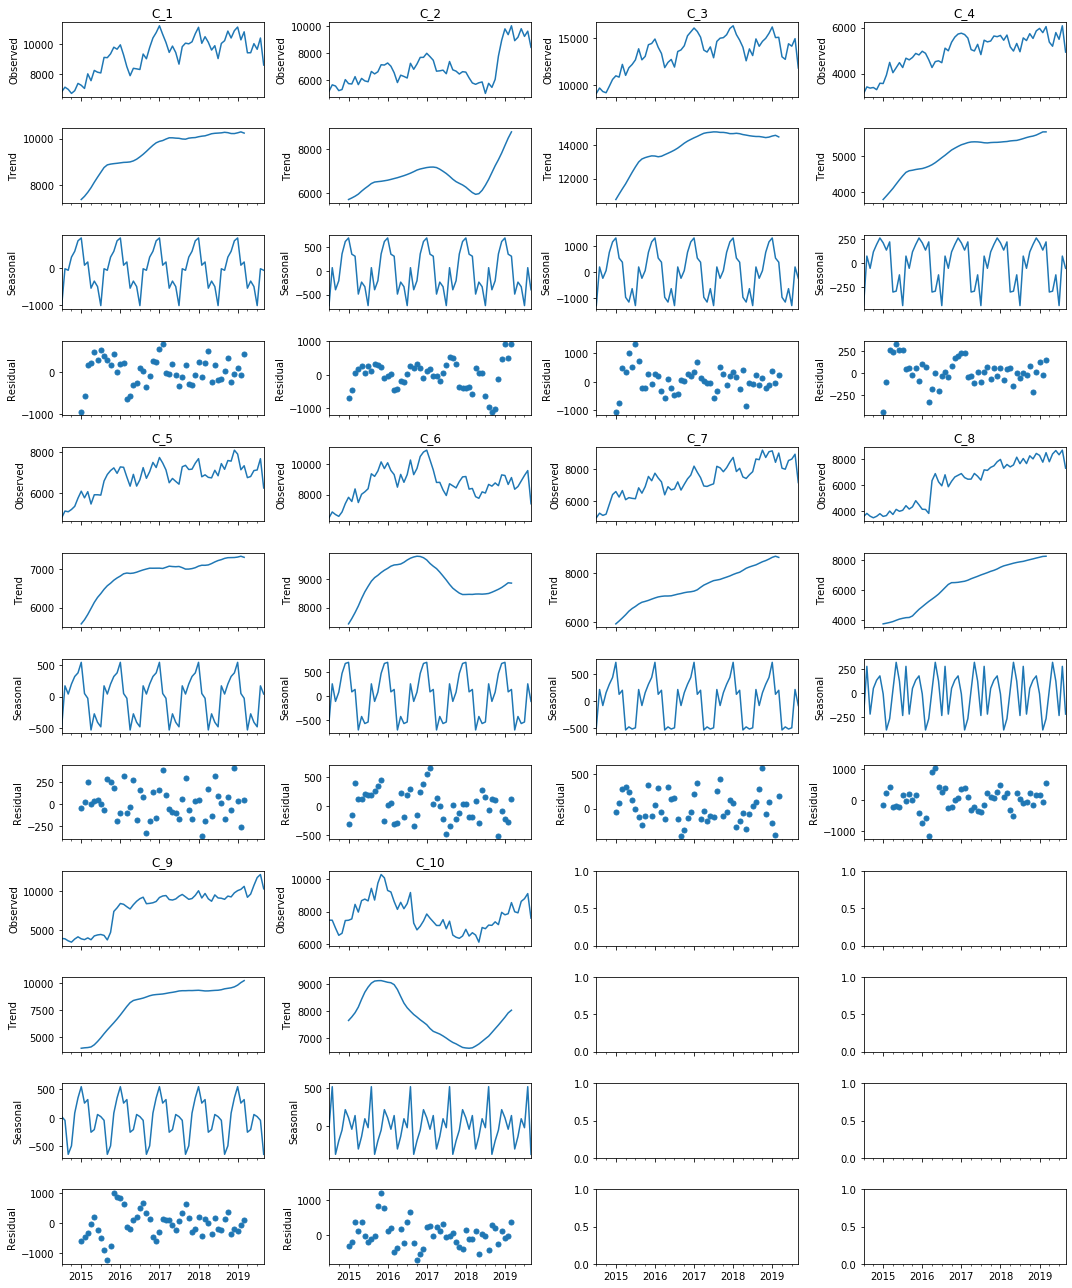

In [34]:
grid_plotseasonal(sales, ncol=4)

In [17]:
d = pd.DataFrame(0, index=sales.columns, columns=["RESMEAN","OBSMEAN","PERC"], dtype=float)
for col in sales.columns:
    result = seasonal_decompose(sales[col], period=12, model='additive')
    res, obs = result.resid, result.observed
    d.loc[col][:2] = list(map(lambda x: np.mean(np.abs(x)), (res, obs[~np.isnan(res)])))
d.PERC = d.RESMEAN*100/d.OBSMEAN
d.round(2)

,RESMEAN,OBSMEAN,PERC
C_1,267.48,9537.53,2.80
C_2,326.79,6756.51,4.84
C_3,327.56,13972.29,2.34
C_4,112.43,5085.02,2.21
C_5,150.68,6922.08,2.18
C_6,224.60,8945.43,2.51
C_7,181.39,7483.16,2.42
C_8,289.22,6292.82,4.60
C_9,349.65,8069.27,4.33
C_10,279.43,7773.47,3.59


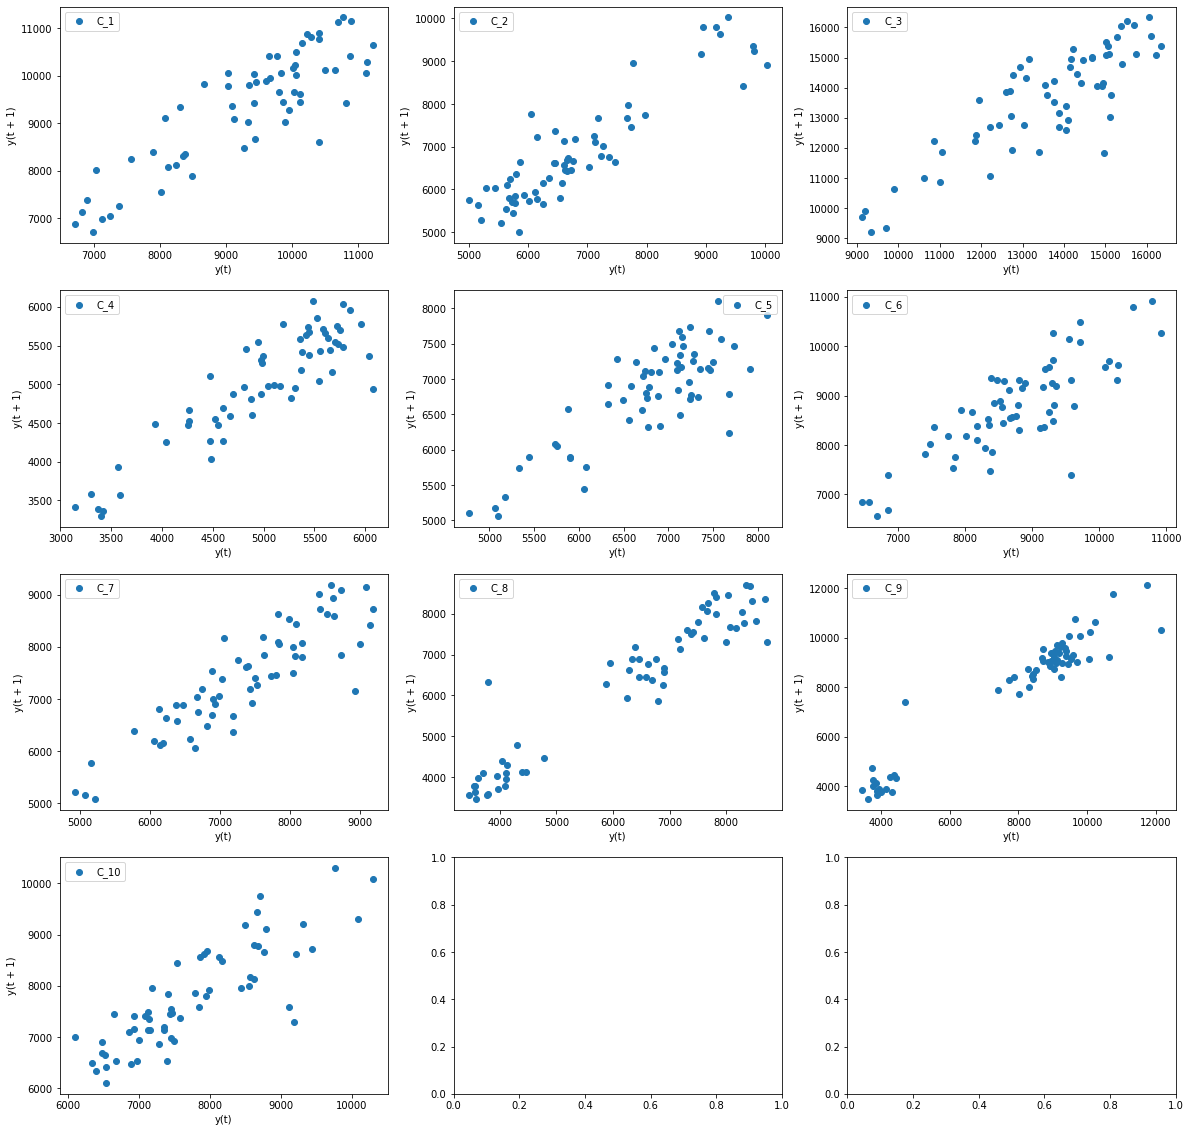

In [19]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()
for name, ax in zip(sales.columns, axes):
    lag_plot(sales[name], ax=ax, label=name)
    ax.legend()

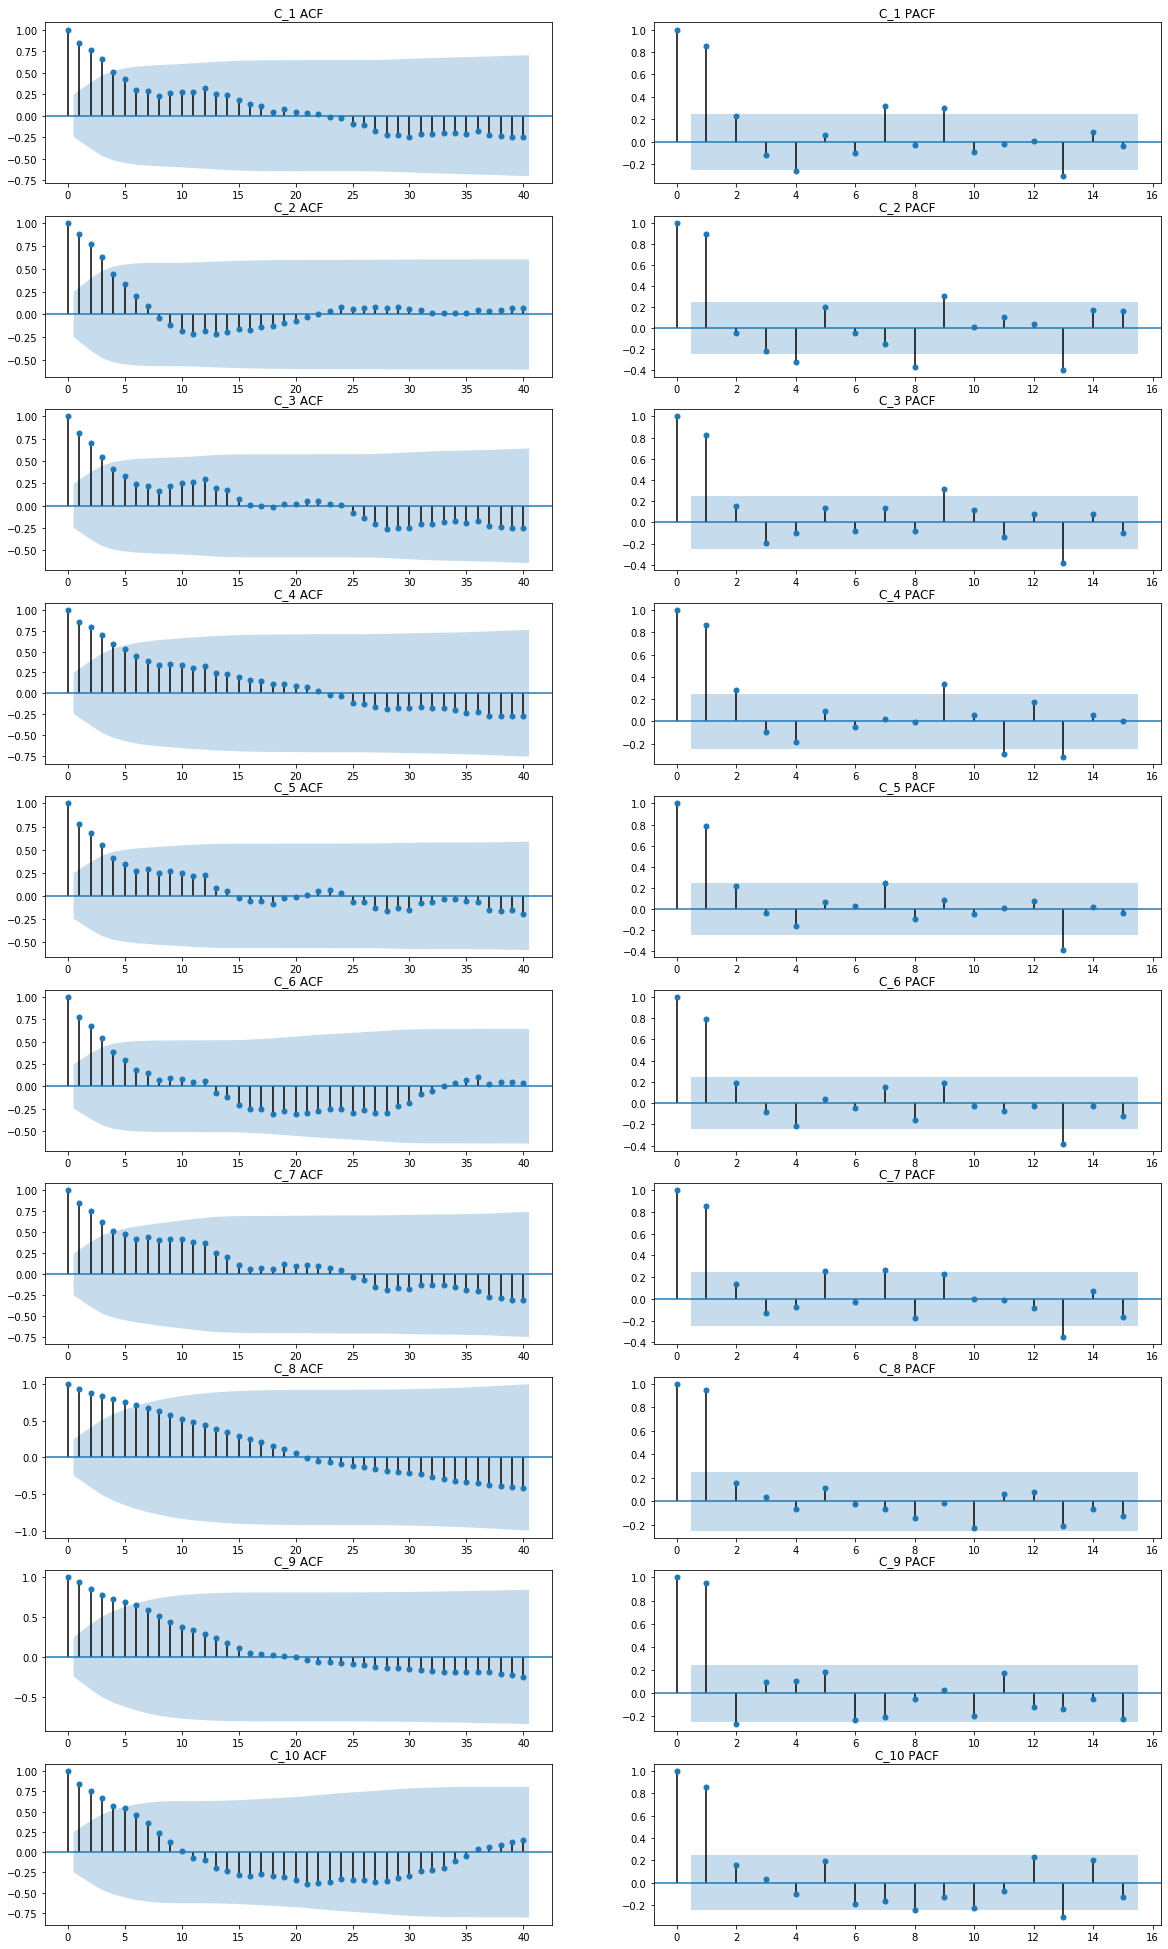

In [20]:
fig, axes = plt.subplots(10, 2, figsize=(20, 35), sharex=False)
alpha=.05
for i, col in enumerate(sales.columns):
    sm.graphics.tsa.plot_acf(sales[col].values.squeeze(), lags=40, ax=axes[i,0], title=f"{col} ACF", alpha=alpha)
    sm.graphics.tsa.plot_pacf(sales[col].values.squeeze(), lags=15, ax=axes[i,1], title=f"{col} PACF", alpha=alpha)

### Frome these resources : 

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://learn.co/lessons/dsc-3-25-09-time-series-decomposition

In [21]:
# Import the check_stationarity function from previous lab
def stationarity_check(TS):
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return None

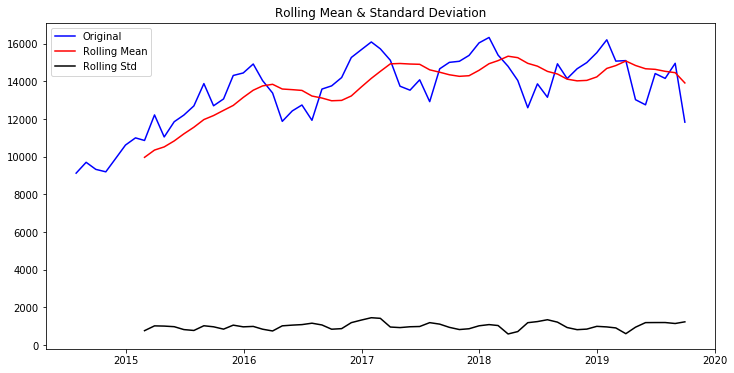

Results of Dickey-Fuller Test:
Test Statistic                 -4.376857
p-value                         0.000326
#Lags Used                     11.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


In [22]:
stationarity_check(sales.C_3)